# Looking At Spiral Tips

## 7/13/2019

### Parsing CSV Files

In [1273]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from pandas import Series, DataFrame
#import matplotlib.image as mpimg
#%matplotlib inline
#TODO: Use the data alignment native to pandas to index the time of data by column 1.



In [1260]:
data_path = "../samples from FastAFSimulation2D/discrim_by_ions.csv"
maxtips = 50 #take this as an argument
rng  = list(np.arange(0,4*(maxtips)+1,1))
data = np.loadtxt(data_path, delimiter=',', skiprows=1,usecols=rng)
times = data[:,0] #index times 1 = 1ms?
ntr   = data[:,1] #number of tips: raw
a     = data[:,5:]
ap = np.reshape(a,(times.size,maxtips-1,4)) #all points: tmax by maxtips-1 by 4 array of raw spiral tip data
del a, data

In [1261]:
class Trajectory():
    """A class to assemble a trajectory."""
        
    def __init__(self, seed=[0,0,0,0], t=0):
        """Initialize location at seed position."""
        self.num_points = 1
        self.x_values   = [seed[2]]
        self.y_values   = [seed[3]]
        self.ifi_values = [seed[1]]
        self.isi_values = [seed[0]]
        self.t = t
        self.tmin = t
        
    def append(self, pt=[0,0,0,0]):
        """Push a point onto a walk."""
        self.num_points = self.num_points + 1
        self.t = self.t + 1
        self.x_values.append(pt[2])
        self.y_values.append(pt[3])
        self.ifi_values.append(pt[0])
        self.isi_values.append(pt[1])
    
    def current(self):
        """Return last."""
        return [self.ifi_values[-1],self.isi_values[-1],self.x_values[-1],self.y_values[-1]]
    
    def fill(self, data):
        """add the next time step to the end of the trajectory"""
        t   = self.t
        nxt = data[t+1]
        # v = nxt[:,2:]-[traj.x_values[-1], traj.y_values[-1]]
        # d = np.array(list(map(lambda xy:norm(xy), v)))
        d = np.array(list(map(lambda xy:dist_pbc(xy, traj.current()[2:]), nxt[:,2:])))
        sorted_ids = np.argsort(d)
        found = False
        for x in sorted_ids:
            if isValid(d[x], nxt[x], traj.current()):
                [nxt, pt] = poprow(nxt,x)
                traj.append(pt)
                data[t+1] = nxt
                self.t = t + 1
                found = True
                break
        if (found and self.t < len(data)-1):
            self.fill(data)
        
    

In [1262]:
def poprow(my_array,pr):
    """ row popping in numpy arrays
    Input: my_array - NumPy array, pr: row index to pop out
    Output: [new_array,popped_row] """
    i = pr
    pop = my_array[i]
    new_array = np.vstack((my_array[:i],my_array[i+1:]))
    return [new_array,pop]

def isValid(ds, pt,ptCur):
    """Returns true if pt is a valid next point"""
    diff = pt - ptCur
    bl = np.abs(diff[0]) < 0.04 and np.abs(diff[1]) < 0.1
#     bl = np.abs(diff[0]) < 0.004 and np.abs(diff[1]) < 0.01
    if ds < 0.2 and bl:
        return True
    else:
        return False

def dist_pbc(pt2,pt1):
    """Returns the dist. between pt1 and pt2 given periodic boundary 
    conditions on the unit square"""
    [x1, y1] = pt1
    [x2, y2] = pt2
    dist_x = np.min([abs(x2+1-x1),abs(x2-x1),abs(x2-1-x1)])
    dist_y = np.min([abs(y2+1-y1),abs(y2-y1),abs(y2-1-y1)])
    return np.sqrt(dist_x**2 + dist_y**2)

In [1263]:
# # number of tips at time t = 6
# t   = 6
# c   = (np.where(ap[t]==[0,0,0,0]))[0][0]
# cur = ap[t,1:c]
# c   = (np.where(ap[t+1]==[0,0,0,0]))[0][0] 
# nxt = ap[t+1,1:c]

In [1264]:
# # initialize some spiral tip at time 6
# [cur, c] = poprow(cur,0)
# traj = Trajectory(c,t)

In [1265]:
# v = nxt[:,2:]-[traj.x_values[-1], traj.y_values[-1]]
# d = np.array(list(map(lambda xy:norm(xy), v)))
# sorted_ids = np.argsort(d)
# for x in sorted_ids:
#     if isValid(nxt[x],traj.current()):
#         [nxt, pt] = poprow(nxt,x)
#         traj.append(pt)
#         print(pt)
#         break

In [1266]:
# #data is a list of all unused points for each time step
# data = []
# tmax = ap.shape[0]
# for t in range(tmax):
#     c   = (np.where(ap[t]==[0,0,0,0]))[0][0] 
#     data.append(ap[t,1:c])

In [1267]:
# tmin = 0
# cur  = data[tmin]

In [1283]:
# # search next time step for valid point, and if one is found, append it and repeat.
# if len(cur) > 0:
#     [cur, c] = poprow(cur,0)
# else:
#     tmin = tmin + 1
# traj = Trajectory(c,tmin)
# traj.fill(data)

In [1282]:
# scatter(traj.x_values,traj.y_values, s=0.1)
# axis([0, 1, 0, 1])
# scatter(ap[5,:,2],ap[5,:,3], s=0.1)

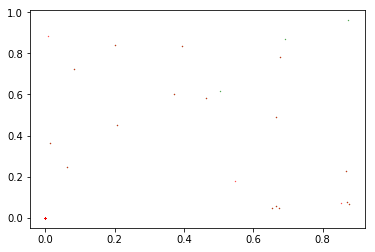

<Figure size 1440x864 with 0 Axes>

<Figure size 2560x1536 with 0 Axes>

In [1286]:
#TODO: make a histogram of speeds = ds/dt => it is safe to say ds<0.1
#TODO: then, improve isValid with a distance threshold. Done.
#TODO: threshhold no the basis of ifi_values
#TODO: look at spiral tip number as a function of time and see if there is only pair production and annihilation.
#TODO: use pd.Series.interpolate after getting the above to work to patch sufficiently similar trajectories together
    #watch out for PBC!
# VISUALIZE some sample data
tau = 54
plt.scatter(ap[tau,:,2],ap[tau,:,3], s=0.1, c = 'green')
plt.scatter(ap[tau+1,:,2],ap[tau+1,:,3], s=0.1, c = 'red')

# Remove the axes.
# plt.axes().get_xaxis().set_visible(False)
# plt.axes().get_yaxis().set_visible(False)

# Set the size of the plotting window. 
plt.figure(figsize=(20, 12))    
plt.figure(dpi=128, figsize=(20, 12))    
plt.show()



# keep_running = input("Make another walk? (y/n): ") 
# if keep_running == 'n':
#     break

In [1289]:
# ser = pd.DataFrame(np.stack((traj.x_values,traj.y_values)).T)
# dser = ser.diff()
# ssqdser = dser.iloc[:,0]**2+dser.iloc[:,1]**2
# ssqdser.hist(bins = 30)

In [1144]:
# ser = pd.DataFrame(np.stack((traj.x_values,traj.y_values)).T)
# dser = ser.diff()
# ssqdser = dser.iloc[:,0]**2+dser.iloc[:,1]**2
# ssqdser.hist(bins = 30)

[0, 0.04, 0, 0.06]

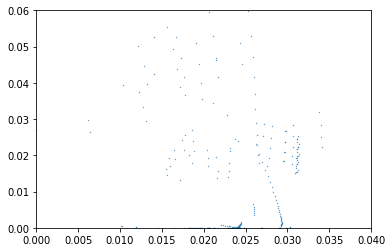

In [1290]:
plt.scatter(list_traj[0].ifi_values,list_traj[0].isi_values, s=0.1)
axis([0, .04, 0, .06])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125b115f8>]],
      dtype=object)

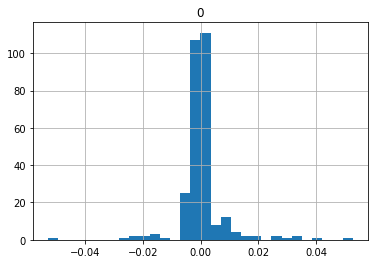

In [1291]:
ser = pd.DataFrame(traj.isi_values)
dser = ser.diff()
dser.hist(bins = 30)

In [1216]:
#TODO: IF (ifi,isi) discrimination doesn't work well enough, 
#     for all next points within a valid distance, select the point that is furthest in a rough line

# ifi histogram => ifi tends to change only by ±0.002 tops, typically decreasing.
#    try selecting only ifi that change by no more than 0.004
# isi histogram => isi tends to change only by ±0.01 tops, typically decreasing by up to 0.006.
#    try selecting only isi that change by no more than 0.01

In [1303]:
#Psuedocode for making a list of all trajectories:
list_traj = []

#data is a list of all unused points for each time step
data = []
tmax = ap.shape[0]
for t in range(tmax):
    c   = (np.where(ap[t]==[0,0,0,0]))[0][0] 
    data.append(ap[t,1:c])
    
#While the current frame has points left in it, fill trajectories with it
tmin = 0
cur  = data[tmin]
while tmin < tmax-2:
    # body
    if len(cur) > 0:
        [cur, c] = poprow(cur,0)
    else:
        tmin = tmin + 1
        cur  = data[tmin]
    traj = Trajectory(c,tmin)
    traj.fill(data)
    list_traj.append(traj)

In [2083]:
#Send all trajectories to DataFrame objects
dt = np.around(list2_traj[0].index[1]-list2_traj[0].index[0],decimals=1)
list2_traj = []
list_tmax =  []
list_tmin =  []
for traj in list_traj:
#     dat  = np.stack((times[traj.tmin:(traj.tmin + traj.num_points)], traj.x_values, traj.y_values, traj.ifi_values, traj.isi_values)).T
    dat  = {
        'times' : times[traj.tmin:(traj.tmin + traj.num_points)],
        'x'     : traj.x_values, 
        'y'     : traj.y_values, 
        'ifi'   : traj.ifi_values, 
        'isi'   : traj.isi_values
    }
    col  = ['times', 'x', 'y', 'ifi', 'isi']
    df   = pd.DataFrame(dat, columns = col).set_index('times')
    list2_traj.append(df)
    list_tmax.append(dat['times'][-1])
    list_tmin.append(dat['times'][0])

In [2088]:
def isValid2(dfh):
    """if the change recorded in dj is sufficient, return True."""
    if(dfh.size==0):
        return False
    ds = dfh.head(1)['ds'].iloc[0]
    print(ds)
    return ds < 0.1
    #TODO: add a isValid2() so only useful concatenations occur
    
def find_mate(traj_cur):
    """Find a trajectory from list2_traj to append to traj_cur 
    and return the index for that trajectory."""
    tmax_cur = traj_cur.index[-1] 
    maxlag = 1.4
    mask = np.where((tmax_cur<list_tmin) & (list_tmin<tmax_cur+maxlag))[0]
    pt1 = traj_cur.iloc[-1]
    list_ds   = []
    list_difi = []
    list_disi = []
    list_tm   = []
    list_j    = []
    J = -1
    for j in mask:
        pt2 = list2_traj[j].iloc[0]
        dtraj = pt2 - pt1
        list_ds.append(dist_pbc([pt2['x'],pt2['y']],[pt1['x'],pt1['y']]))
        list_difi.append(dtraj['ifi'])
        list_disi.append(dtraj['isi'])
        list_tm.append(list_tmin[j])
        list_j.append(j)
        
    # sort points and return the id of the trajectory to be patched
    values = np.stack([list_ds, list_difi, list_disi, list_tm, list_j]).T
    df     =  pd.DataFrame(values)
    dfh    = df.rename(columns={0:'ds', 1:'difi', 2:'disi', 3:'tmin', 4:'j'}).sort_values(by=['ds','difi', 'tmin'])
    dj     = dfh.head(1)['j']
    if(isValid2(dfh)):
        J  = int(dj.iloc[0])
    return J
    
def patch_mate(traj_cur, j):
    """Return a patch of list2_traj2 with traj_cur using linear interpolation."""
    #patch and interpolate two trajectories
    blank = pd.DataFrame(index = arange(tmax_cur,list_tmin[j],dt)[1:])
    df = pd.concat([traj_cur,blank, list2_traj[j]], sort=False).interpolate()
    return df

def delete_mate(j):
    """Delete the jth trajectory from list2_traj, list_tmin, and list_tmax."""
     #save df to the original list and delete the other original trajectory
    del list2_traj[j], list_tmin[j], list_tmax[j]

In [2089]:
#TODO: update spiral tip tracker to interpolate spiral tip positions when only one pixel is highlighted
# list2_traj[0].loc[:,'x']*512 has half pixel resolution => BAD

tau = 0
#while the current trajectory can have points appended to it <=> J!=-1)
while(tau<len(list2_traj)):
    traj_cur = list2_traj[tau]
    #find patchable trajectory index
    J = find_mate(traj_cur)
    #if a patchable trajectory was found, then append it and update the data
    if(J>-1):
        list2_traj[tau] = patch_mate(traj_cur, J)
        delete_mate(J)
    #else, progress to the next trajectory
    else:
        tau = tau + 1

0.3061176870585529
0.17471464597889683
0.1287582009675743
0.10441458128612234
0.15810664496358345
0.20075426922316778
0.18921134701145867
0.1562988204979887
0.001953125
0.15831159475905815
0.001953125
0.001953125
0.001953125
0.001953125
0.0027621358640099515
0.0027621358640099515
0.001953125
0.001953125
0.001953125
0.001953125
0.0027621358640099515
0.001953125
0.001953125
0.001953125
0.001953125
0.001953125
0.23840928936979888
0.001953125
0.1143537591273785
0.001953125
0.001953125
0.001953125
0.001953125
0.0
0.0027621358640099515
0.30202159031371417
0.001953125
0.19999275194385951
0.001953125
0.001953125
0.001953125
0.0
0.001953125
0.001953125
0.001953125
0.001953125
0.23261054579624071
0.001953125
0.0
0.001953125
0.0773891123287459
0.001953125
0.12495421524783838
0.001953125
0.001953125
0.001953125
0.08963120238737317
0.08771684208158445
0.08963120238737317
0.08734640537108554
0.08894763700574766
0.001953125
0.0
0.08894763700574766
0.3053690794075313
0.0
0.001953125
0.0
0.001953125
0.

0.001953125
0.331053247139197
0.0
0.23502513994517693
0.03876842429937345
0.001953125
0.0027621358640099515
0.0
0.1635268413198006
0.03179457147675724
0.14171937448181043
0.013810679320049757
0.013810679320049757
0.01188039556698871
0.05402076830445051
0.06176323555016366
0.4515733130193258
0.22545696055889053
0.0
0.24439830151855854
0.3257212924442651
0.0
0.42552135129762436
0.0027621358640099515
0.03250647847088523
0.0
0.001953125
0.022269051271467537
0.0
0.05875628498629423
0.001953125
0.28683687110446593
0.2252961646730948
0.0
0.20706809813591517
0.001953125
0.34410493039914436
0.23979730311667655
0.2292739154817061
0.3848003236257735
0.0
0.056640625
0.17403647976519893
0.19850899917612363
0.2352360485451927
0.22971440371772647
0.34410493039914436
0.0
0.09391261937633834
0.23892874372933476
0.0
0.27970632138137874
0.27970632138137874
0.3420702032124126
0.32188661424737847
0.0
0.2776805283596207
0.0
0.18347943582085874
0.001953125
0.001953125
0.0705562182351111
0.0726866955700328
0.

0.19305334051799325
0.14031269574735789
0.10008693730717935
0.10008693730717935
0.33217483108779194
0.34199770885391634
0.31484108443350534
0.31484108443350534
0.10054326309557618
0.10186253758129139
0.0
0.0
0.19391098717521302
0.123046875
0.015254393898255184
0.21882845970163622
0.001953125
0.11048543456039805
0.15234375
0.3759955859635356
0.11915663314585659
0.23334735646570168
0.001953125
0.0
0.253613112034262
0.22482157096135427
0.001953125
0.001953125
0.04728015014418049
0.0
0.001953125
0.1411124364702222
0.001953125
0.0
0.3125610291969494
0.4613387091292206
0.2540939810792517
0.0
0.10044836617674836
0.001953125
0.0027621358640099515
0.03601384553630034
0.06228601062149209
0.0
0.0637688582707598
0.001953125
0.32738593291750584
0.0
0.3864276445376167
0.3966142413546348
0.001953125
0.09858929268846846
0.17281569631424723
0.0
0.15606678711697639
0.15606678711697639
0.001953125
0.001953125
0.0027621358640099515
0.001953125
0.05211587525049349
0.0027621358640099515
0.0
0.001953125
0.15

0.001953125
0.001953125
0.001953125
0.0027621358640099515
0.001953125
0.24472586105745445
0.001953125
0.001953125
0.0027621358640099515
0.001953125
0.001953125
0.001953125
0.001953125
0.19193366430655312
0.0
0.25866926767411413
0.31293914456827704
0.31293914456827704
0.10312795923784442
0.019236050394133015
0.27855150759386044
0.19058737461668665
0.0
0.5175818101283904
0.1040119293413621
0.12440348390073577
0.12440348390073577
0.001953125
0.001953125
0.12109375
0.0
0.001953125
0.2543565718140579
0.10129923812414016
0.10129923812414016
0.29749113694780893
0.0
0.001953125
0.001953125
0.17403647976519893
0.14680953494504792
0.22726856574670087
0.11992251119538087
0.0
0.05717687956368925
0.001953125
0.04336641271713773
0.09181765057455593
0.0
0.0
0.1321935254610759
0.1427920056752675
0.0
0.19089736241895963
0.37215104316094727
0.001953125
0.0
0.046875
0.012506102026236032
0.16134278459424517
0.35597277110690817
0.11338222870078118
0.11338222870078118
0.0027621358640099515
0.001953125
0.001

0.001953125
0.10706617245051364
0.22269051271467538
0.24310718775126358
0.23380464455695968
0.25110382534624126
0.0027621358640099515
0.0
0.0
0.1849703213366691
0.22269051271467538
0.08029220621521276
0.001953125
0.06608954810815872
0.0
0.31416184102070005
0.2902872070857692
0.2896755007796709
0.14474224463788207
0.2309978037808206
0.1849703213366691
0.26164586205194656
0.013810679320049757
0.014084184669781208
0.011388577919619728
0.23519550388735777
0.21969834888308362
0.0
0.1824369305885684
0.19807615044965188
0.18410210537926536
0.0
0.13452480748220752
0.1773476217914357
0.0
0.10358930161075093
0.004367320268554277
0.0
0.0027621358640099515
0.001953125
0.001953125
0.08017334278036638
0.1335000585205864
0.0027621358640099515
0.001953125
0.001953125
0.0027621358640099515
0.001953125
0.10320191260642896
0.09018278422355622
0.07539163697507337
0.3247888906448743
0.294358682038438
0.20003089666134236
0.1809673341390391
0.0027621358640099515
0.001953125
0.001953125
0.001953125
0.00195312

0.0
0.14823176532039278
0.001953125
0.23587572918624042
0.001953125
0.2269158074956574
0.0
0.22737764191101908
0.001953125
0.19367477433287647
0.027964494264211628
0.06771459305999888
0.0
0.13673270018114952
0.10786485368346935
0.40578492760414736
0.12840218682729376
0.001953125
0.0
0.18702128014885264
0.2269158074956574
0.001953125
0.2597949936405687
0.13419830770548347
0.38590903235088964
0.24865360098186795
0.2500686551237292
0.23150917170175192
0.23150917170175192
0.001953125
0.06132936901604524
0.0
0.2127113637481038
0.27203883353875236
0.27203883353875236
0.001953125
0.0027621358640099515
0.051895821310884466
0.05021468801633766
0.05021468801633766
0.4300868172940857
0.2730815205130203
0.16079806611525604
0.1653248496391366
0.09578281121280648
0.13773340009581236
0.16435288661258926
0.2656537208737391
0.0
0.1040119293413621
0.13854803008568906
0.12415793027588139
0.2844932897007689
0.24789303792553982
0.24789303792553982
0.001953125
0.06518874714171342
0.0
0.11488625913947455
0.0

0.3396528738389111
0.2524598223758832
0.0
0.2785857424010436
0.12513725374719803
0.2822248729404444
0.13499188434083964
0.001953125
0.2236903753700707
0.15341669442699596
0.1550859963367603
0.14471588713158362
0.25526977629834335
0.07042092334890604
0.24032169398862538
0.0
0.22541465697271107
0.1739597465168397
0.0
0.1607268797768827
0.0
0.09540370892046729
0.11530056361832376
0.28326373273886696
0.11302840856429912
0.005524271728019903
0.23835328060874916
0.21781503596533028
0.16861476424294264
0.2270418555033204
0.30026081192153803
0.22958151519480097
0.1650477299868984
0.004367320268554277
0.28483500740834594
0.0
0.001953125
0.10012504389043982
0.11008766149251525
0.11008766149251525
0.1838117887450112
0.18192392222179715
0.295703383008474
0.25658145959939554
0.21495913094938682
0.40357914855749255
0.3672706022982237
0.17290396892698306
0.32410107051080533
0.001953125
0.2859377668202307
0.28621112676140187
0.13834137552316236
0.0
0.13834137552316236
0.12194133811553098
0.00276213586

0.10000000000000009

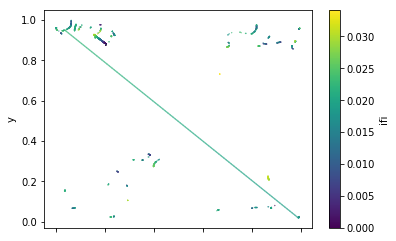

In [2094]:
ax2 = list2_traj[0].plot.scatter(x='x',
                      y='y',
                      c='ifi',
                      s= 0.1,
                      colormap='viridis')
#TODO: fix interpolation function to work with pbc
1.1%1

In [2095]:
# df.loc[2411.4:]
# list2_traj[j].head()
# list2_traj[tau].tail()
list_ds

[0.253372335275979,
 0.253372335275979,
 0.5227519998243072,
 0.0027621358640099515,
 0.0027621358640099515,
 0.5996125559769043]

In [2039]:
list2_traj[0]['x'].iloc[0]

0.8935546875

In [1987]:
traj_cur = list2_traj[tau]
#TODO: pop this instead eventually

In [2064]:
values = np.stack([list_ds, list_difi, list_disi, list_tm, mask]).T
df     =  pd.DataFrame(values)
dfh    = df.rename(columns={0:'ds', 1:'difi', 2:'disi', 3:'tmin', 4:'j'}).sort_values(by=['ds','difi', 'tmin']).head(1)
dj     = dfh['j']
if(isValid2(dfh)):
    J  = int(dj.iloc[0])

In [2061]:
dfh['ds'].iloc[0] < 0.1

True

In [2071]:
def patch_mate_pbc(traj_cur, j):
    """Return a patch of list2_traj2 with traj_cur using linear interpolation 
    with periodic boundary conditions considered."""
    #patch and interpolate two trajectories
    blank = pd.DataFrame(index = arange(tmax_cur,list_tmin[j],dt)[1:])
    df = pd.concat([traj_cur,blank, list2_traj[j]], sort=False).interpolate()
    return df

#TODO:   
# If dist_pbc is x-activated: add s.t. it is not activated, 
# then use linear interpolation like usual, taking mod 1 at the end.
# Repeat for y
# use normal interpolation for ifi and isi

# For reference:
def dist_pbc(pt2,pt1):
    """Returns the dist. between pt1 and pt2 given periodic boundary 
    conditions on the unit square"""
    [x1, y1] = pt1
    [x2, y2] = pt2
    dist_x = np.min([abs(x2+1-x1),abs(x2-x1),abs(x2-1-x1)])
    dist_y = np.min([abs(y2+1-y1),abs(y2-y1),abs(y2-1-y1)])
    return np.sqrt(dist_x**2 + dist_y**2)

IndexError: single positional indexer is out-of-bounds

In [2096]:
single positional indexer is out-of-bounds

SyntaxError: invalid syntax (<ipython-input-2096-686be457c45b>, line 1)

# Tracking Notes

In [2097]:
# 2 nn.conv2d with periodic boundary conditions
import tensorflow as tf
import pytorch as nn

# ?nn.ReflectionPad2d
# ?F.pad

# from autograd import Function
# class PeriodicPadding2d(Function):
#     @staticmethod
#     def forward(ctx, input, pad):
#         output = np.periodicpad(input, pad)  # find the function that performs what you want
#         ctx.pad = pad
#         ctx.size = input.size()
#         ctx.numel = input.numel()
#         return output

#     @once_differentiable
#     @staticmethod
#     def backward(ctx, grad_output):
#         pad = ctx.pad
#         idx = grad_output.new(ctx.size)
#         torch.arange(0, ctx.numel, out=idx)
#         idx = np.periodicpad(idx, pad)  # or whatever is the function
#         grad_input = grad_output.new(ctx.numel).zero_()
#         grad_input.index_add_(0, idx, grad_output.view(-1))
#         return grad_input.view(ctx.size)

ModuleNotFoundError: No module named 'pytorch'

project spiral tips into a sparse matrix then, use OpenCV tracking then, impose periodic boundary conditions then, streamline by using periodic OpenCV tracking directly from JavaScript then, output some useful bloody data en masse.




In [2098]:
# # import the necessary packages
# from imutils.video import VideoStream
# from imutils.video import FPS
# import argparse
# import imutils
# import time
# import cv2

# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-v", "--video", type=str,
# 	help="path to input video file")
# ap.add_argument("-t", "--tracker", type=str, default="kcf",
# 	help="OpenCV object tracker type")
# args = vars(ap.parse_args())

# %tb


# # extract the OpenCV version info
# (major, minor) = cv2.__version__.split(".")[:2]
 
# # if we are using OpenCV 3.2 OR BEFORE, we can use a special factory
# # function to create our object tracker
# if int(major) == 3 and int(minor) < 3:
# 	tracker = cv2.Tracker_create(args["tracker"].upper())
 
# # otherwise, for OpenCV 3.3 OR NEWER, we need to explicity call the
# # approrpiate object tracker constructor:
# else:
# 	# initialize a dictionary that maps strings to their corresponding
# 	# OpenCV object tracker implementations
# 	OPENCV_OBJECT_TRACKERS = {
# 		"csrt": cv2.TrackerCSRT_create,
# 		"kcf": cv2.TrackerKCF_create,
# 		"boosting": cv2.TrackerBoosting_create,
# 		"mil": cv2.TrackerMIL_create,
# 		"tld": cv2.TrackerTLD_create,
# 		"medianflow": cv2.TrackerMedianFlow_create,
# 		"mosse": cv2.TrackerMOSSE_create
# 	}
 
# 	# grab the appropriate object tracker using our dictionary of
# 	# OpenCV object tracker objects
# 	tracker = OPENCV_OBJECT_TRACKERS[args["tracker"]]()
 
# # initialize the bounding box coordinates of the object we are going
# # to track
# initBB = None


# # if a video path was not supplied, grab the reference to the web cam
# if not args.get("video", False):
# 	print("[INFO] starting video stream...")
# 	vs = VideoStream(src=0).start()
# 	time.sleep(1.0)
 
# # otherwise, grab a reference to the video file
# else:
# 	vs = cv2.VideoCapture(args["video"])
 
# # initialize the FPS throughput estimator
# fps = None


# # loop over frames from the video stream
# while True:
# 	# grab the current frame, then handle if we are using a
# 	# VideoStream or VideoCapture object
# 	frame = vs.read()
# 	frame = frame[1] if args.get("video", False) else frame
 
# 	# check to see if we have reached the end of the stream
# 	if frame is None:
# 		break
 
# 	# resize the frame (so we can process it faster) and grab the
# 	# frame dimensions
# 	frame = imutils.resize(frame, width=500)
# 	(H, W) = frame.shape[:2]
    
#     from __future__ import print_function
# import cv2 as cv
# import argparse
# def detectAndDisplay(frame):
#     frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#     frame_gray = cv.equalizeHist(frame_gray)
#     #-- Detect faces
#     faces = face_cascade.detectMultiScale(frame_gray)
#     for (x,y,w,h) in faces:
#         center = (x + w//2, y + h//2)
#         frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
#         faceROI = frame_gray[y:y+h,x:x+w]
#         #-- In each face, detect eyes
#         eyes = eyes_cascade.detectMultiScale(faceROI)
#         for (x2,y2,w2,h2) in eyes:
#             eye_center = (x + x2 + w2//2, y + y2 + h2//2)
#             radius = int(round((w2 + h2)*0.25))
#             frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
#     cv.imshow('Capture - Face detection', frame)
# parser = argparse.ArgumentParser(description='Code for Cascade Classifier tutorial.')
# parser.add_argument('--face_cascade', help='Path to face cascade.', default='data/haarcascades/haarcascade_frontalface_alt.xml')
# parser.add_argument('--eyes_cascade', help='Path to eyes cascade.', default='data/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
# parser.add_argument('--camera', help='Camera devide number.', type=int, default=0)
# args = parser.parse_args()
# face_cascade_name = args.face_cascade
# eyes_cascade_name = args.eyes_cascade
# face_cascade = cv.CascadeClassifier()
# eyes_cascade = cv.CascadeClassifier()
# #-- 1. Load the cascades
# if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
#     print('--(!)Error loading face cascade')
#     exit(0)
# if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
#     print('--(!)Error loading eyes cascade')
#     exit(0)
# camera_device = args.camera
# #-- 2. Read the video stream
# cap = cv.VideoCapture(camera_device)
# if not cap.isOpened:
#     print('--(!)Error opening video capture')
#     exit(0)
# while True:
#     ret, frame = cap.read()
#     if frame is None:
#         print('--(!) No captured frame -- Break!')
#         break
#     detectAndDisplay(frame)
#     if cv.waitKey(10) == 27:
#         break
        
        
        
#         # Start by making a sparse matrix in scipy and then use feature tracking by OpenCV
        
#         from sklearn.neighbors import NearestNeighbors
# import numpy as np

# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
# distances, indices = nbrs.kneighbors(X)
# indices                                           






# distances



# nbrs.kneighbors_graph(X).toarray()


# from sklearn.neighbors import KDTree
# import numpy as np
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# kdt = KDTree(X, leaf_size=30, metric='euclidean')
# kdt.query(X, k=2, return_distance=False)          



# from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
# KNeighborsClassifier)
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# X, y = load_iris(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
# stratify=y, test_size=0.7, random_state=42)
# nca = NeighborhoodComponentsAnalysis(random_state=42)
# knn = KNeighborsClassifier(n_neighbors=3)
# nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
# nca_pipe.fit(X_train, y_train) 

# print(nca_pipe.score(X_test, y_test)) 





# ### TODO: Failing that, put sparse matrix into an sklearn feature tracker
# ### Failing that, try opencv feature tracker
# ### Failing that, see all those tabs you left open describing feature tracking
